In [1]:
import numpy as np
import pandas as pd
from datetime import datetime 
from datetime import timedelta
import csv 
import matplotlib.pyplot as plt
from datetime import date
from datetime import time
from sklearn.datasets import load_iris
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)
import seaborn as sns
from matplotlib import pyplot

In [2]:
#convert seconds to weeks, days, hours, minutes, seconds

intervals = (
    ('days', 86400),    # 60 * 60 * 24
    ('hours', 3600),    # 60 * 60
    ('minutes', 60),
    ('seconds', 1),
    )

def display_time(seconds, granularity=2):
    result = []

    for name, count in intervals:
        value = seconds // count
        if value:
            seconds -= value * count
            if value == 1:
                name = name.rstrip('s')
            result.append("{} {}".format(value, name))
    return ', '.join(result[:granularity])

In [3]:
def secToDays(seconds):
    """Converts seconds to days"""
    seconds_in_day = 60 * 60 * 24
    seconds_in_hour = 60 * 60
    seconds_in_minute = 60

    days = seconds // seconds_in_day
    hours = (seconds - (days * seconds_in_day)) // seconds_in_hour
    minutes = (seconds - (days * seconds_in_day) - (hours * seconds_in_hour)) // seconds_in_minute

    return int(days)

In [4]:
def convertTimeStamp(string):
    """Converts a string to a datetime object.
    """
    time = datetime.strptime(string,'%m/%d/%Y %I:%M:%S %p') #Accepts time string, converts it to datetime object.
    return time
    
def elapsedTime(filepath):
    dataframe = pd.read_csv(filepath)
    
    #filter dateset to CreatedDate and UpdatedDate columns
    created_df = dataframe['CreatedDate'].dropna().apply(convertTimeStamp, 0) #apply convertTimeStamp to CreatedDate
    updated_df = dataframe['UpdatedDate'].dropna().apply(convertTimeStamp, 0) #apply convertTimeStamp to UpdatedDate
    
    #create elapsedTime column
    elapsed_df = updated_df - created_df #calculate the difference in the values in CreatedDate and UpdatedDate
    dataframe.insert(3, "ElapsedTime", elapsed_df) #create column ElapsedTime with dataframe elapsed_df into dataframe dataframe
    
    elapsed_seconds = dataframe['ElapsedTime'].dt.total_seconds()
    elapsed_days = elapsed_seconds.apply(secToDays) #or display time 1 in a new column in for loop
    dataframe.insert(5, 'ElapsedTime in Seconds', elapsed_seconds)
    dataframe.insert(4, 'Elapsed Days', elapsed_days)
    
    df1 = dataframe[['CreatedDate', 'UpdatedDate', 'ElapsedTime']]

    dataframe.hist(column='Elapsed Days', figsize=(11.7,8.27), range=[0, 7])
    plt.title('Distribution of Elapsed Days (0-7 Days)')
    plt.xlabel('Elapsed Days')
    plt.ylabel('Service Requests')
    
    dataframe.hist(column='Elapsed Days', figsize=(11.7,8.27), range=[8, max(elapsed_days)])
    plt.title('Distribution of Elapsed Days (8+ Days)')
    plt.xlabel('Elapsed Days')
    plt.ylabel('Service Requests')
    
    return df1

C:\Users\hanaa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,CreatedDate,UpdatedDate,ElapsedTime
0,01/01/2019 12:02:00 AM,01/04/2019 11:03:00 AM,3 days 11:01:00
1,01/01/2019 12:05:00 AM,01/01/2019 12:09:00 AM,0 days 00:04:00
2,01/01/2019 12:10:00 AM,01/03/2019 12:27:00 AM,2 days 00:17:00
3,01/01/2019 12:19:00 AM,01/07/2019 09:43:00 AM,6 days 09:24:00
4,01/01/2019 12:28:00 AM,01/03/2019 12:28:00 AM,2 days 00:00:00
...,...,...,...
1308088,12/31/2019 11:26:00 PM,01/03/2020 04:09:00 PM,2 days 16:43:00
1308089,12/31/2019 11:26:00 PM,01/14/2020 07:52:00 AM,13 days 08:26:00
1308090,12/31/2019 11:30:00 PM,01/03/2020 11:36:00 AM,2 days 12:06:00
1308091,12/31/2019 11:54:00 PM,01/06/2020 08:45:00 PM,5 days 20:51:00


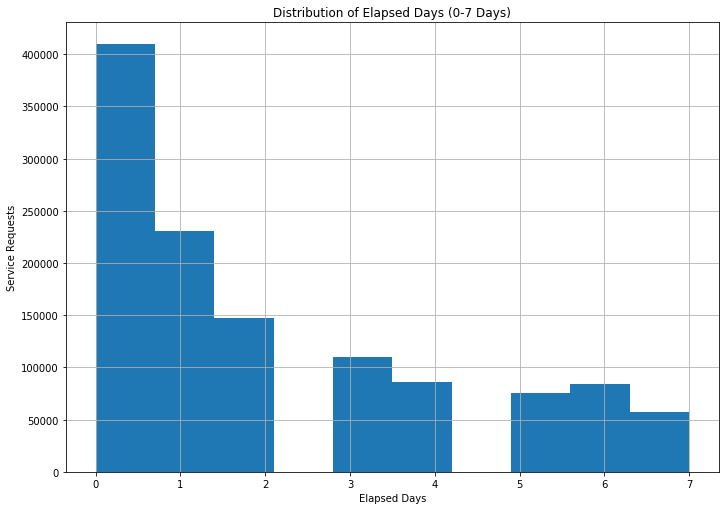

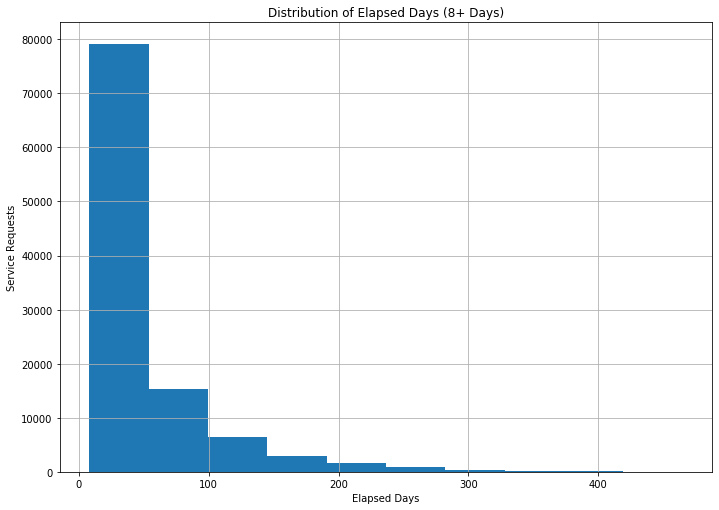

In [5]:
elapsedTime(r"C:\Users\hanaa\Downloads\MyLA311_Service_Request_Data_2019.csv")

C:\Users\hanaa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,CreatedDate,UpdatedDate,ElapsedTime
0,01/01/2018 12:00:00 AM,01/06/2018 10:18:00 AM,5 days 10:18:00
1,01/01/2018 12:05:00 AM,01/03/2018 12:14:00 PM,2 days 12:09:00
2,01/01/2018 12:08:00 AM,01/02/2018 10:10:00 PM,1 days 22:02:00
3,01/01/2018 12:09:00 AM,01/03/2018 12:52:00 PM,2 days 12:43:00
4,01/01/2018 12:10:00 AM,01/06/2018 09:56:00 AM,5 days 09:46:00
...,...,...,...
1210070,12/31/2018 11:40:00 PM,01/02/2019 09:55:00 AM,1 days 10:15:00
1210071,12/31/2018 11:43:00 PM,01/02/2019 11:10:00 AM,1 days 11:27:00
1210072,12/31/2018 11:50:00 PM,01/15/2019 11:11:00 AM,14 days 11:21:00
1210073,12/31/2018 11:53:00 PM,01/04/2019 02:37:00 PM,3 days 14:44:00


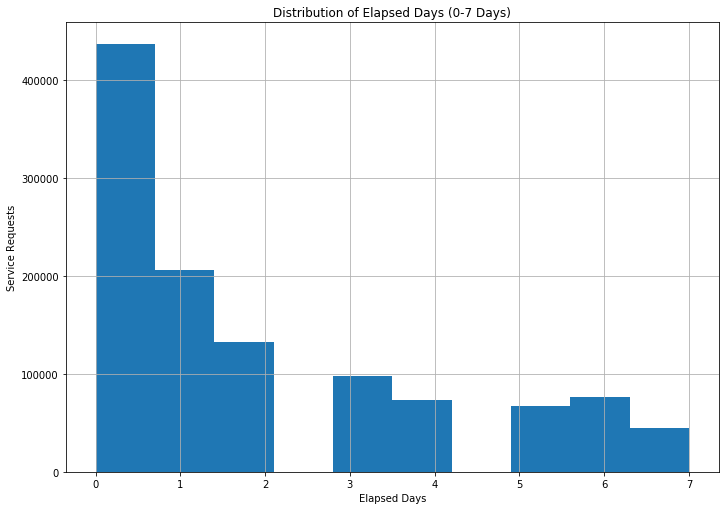

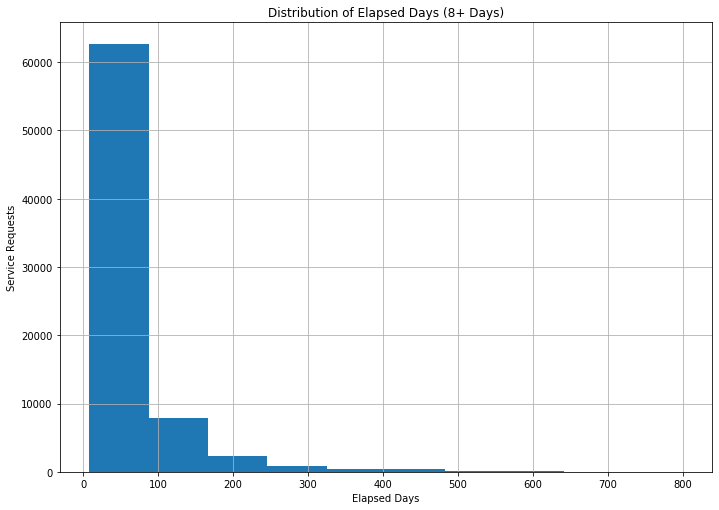

In [6]:
elapsedTime(r"C:\Users\hanaa\Downloads\MyLA311_Service_Request_Data_2018.csv")

,CreatedDate,UpdatedDate,ElapsedTime
0,01/01/2018 12:00:00 AM,01/06/2018 10:18:00 AM,5 days 10:18:00
1,12/31/2017 11:59:00 PM,04/09/2018 09:25:00 AM,98 days 09:26:00
2,12/31/2017 11:56:00 PM,01/03/2018 10:11:00 AM,2 days 10:15:00
3,12/31/2017 11:53:00 PM,01/03/2018 10:12:00 AM,2 days 10:19:00
4,12/31/2017 11:51:00 PM,01/03/2018 10:11:00 AM,2 days 10:20:00
...,...,...,...
1131553,01/01/2017 01:09:00 AM,01/04/2017 05:34:00 PM,3 days 16:25:00
1131554,01/01/2017 01:01:00 AM,01/04/2017 05:33:00 PM,3 days 16:32:00
1131555,01/01/2017 12:46:00 AM,01/01/2017 09:27:00 AM,0 days 08:41:00
1131556,01/01/2017 12:45:00 AM,01/12/2017 05:10:00 PM,11 days 16:25:00


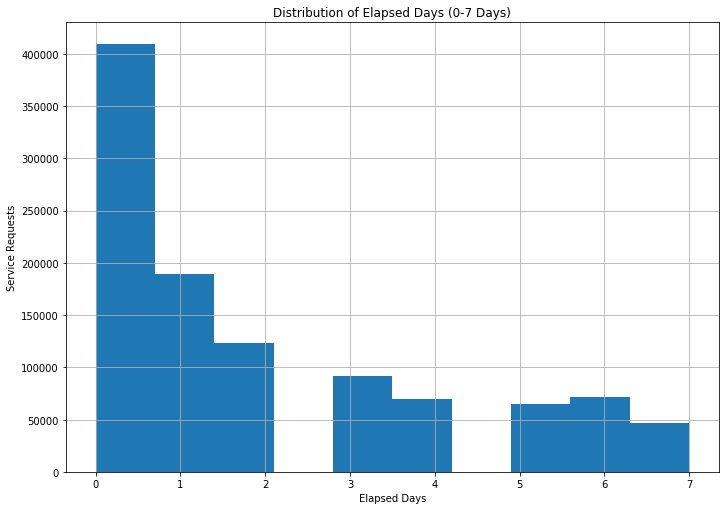

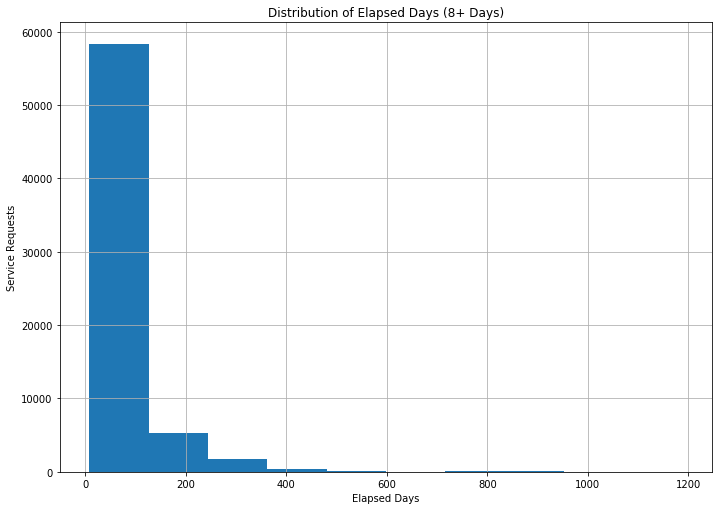

In [7]:
elapsedTime(r"C:\Users\hanaa\Downloads\MyLA311_Service_Request_Data_2017.csv")